# [GSE85217] check CV

In [5]:
import pandas as pd
import numpy as np
import os
import math
from collections import OrderedDict

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression

import sys
sys.path.insert(1,'/home/thomas/Documents/git/medulloblastoma_cavalli_kaggle/code/local_version/fun')

from parser import Data

In [7]:
path_data_prot_coding='/home/thomas/Documents/git/medulloblastoma_cavalli_kaggle/data/in/protein_coding/'
path_metadata_prot_coding = path_data_prot_coding + 'GSE85217_Cavalli_subgroups_information_protein_coding.csv'
path_exp_mat_prot_coding = path_data_prot_coding + 'GSE85217_M_exp_763_MB_SubtypeStudy_TaylorLab_protein_coding.csv'

exp_mat = pd.read_csv(path_exp_mat_prot_coding,index_col=0)
metadata = pd.read_csv(path_metadata_prot_coding,index_col=0)

exp_mat.columns = exp_mat.columns.str.replace('-','_')
exp_mat.columns = exp_mat.columns.str.replace(':', '', regex=False)

In [8]:
mean_exp_mat = exp_mat.mean(axis=0)
sd_exp_mat = exp_mat.std(axis=0)
var_exp_mat = exp_mat.var(axis=0)
cv_exp_mat = sd_exp_mat/mean_exp_mat

data_cv_mean=pd.concat([mean_exp_mat,sd_exp_mat,cv_exp_mat,var_exp_mat],axis=1)
data_cv_mean.columns=['mean','sd','cv','var']

**Linear regression**

In [9]:
X = data_cv_mean['cv'].values.reshape(-1,1)
y = data_cv_mean['sd'].values

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0]
intercept = model.intercept_
r_squared = model.score(X, y)

r_squared

0.8047103717561449

**Statsmodel**

In [10]:
#model = sm.ols(formula="cv ~ sd", data=data_cv_mean)
#sm_reg_model = model.fit()

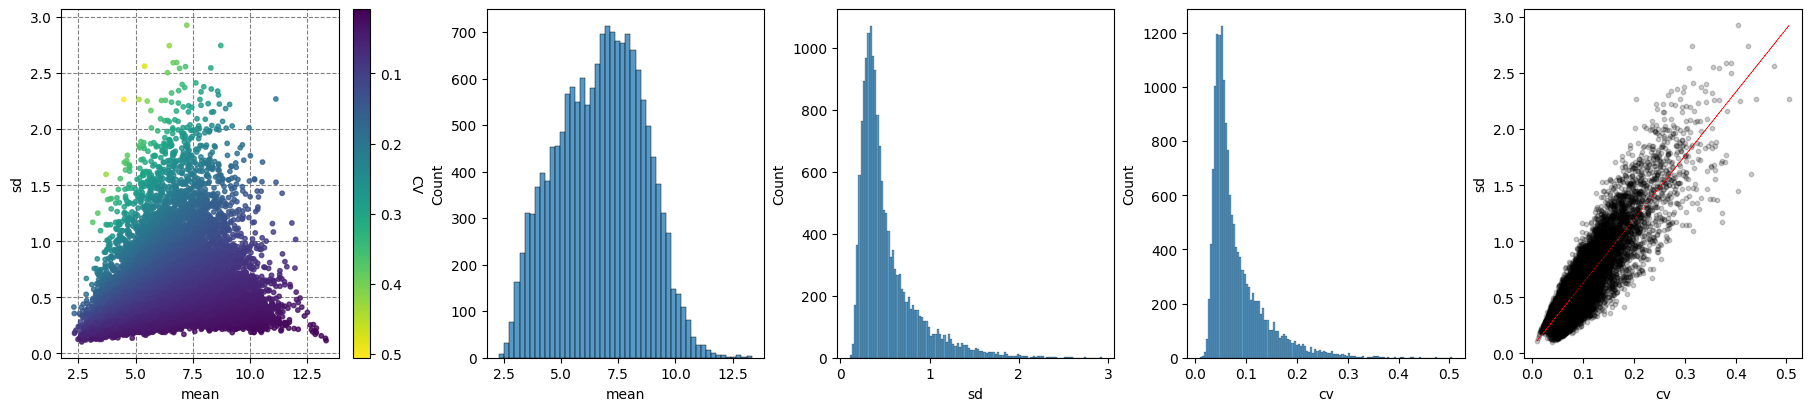

In [11]:
fig, (ax, hist_mean, hist_sd, hist_cv, reg) = plt.subplots(1,5, figsize=(18,4),constrained_layout=True)

norm = plt.Normalize(data_cv_mean['cv'].min(),data_cv_mean['cv'].max())
colors = cm.viridis(norm(data_cv_mean['cv']))

ax.set_axisbelow(True)
ax.yaxis.grid(color='gray', linestyle='dashed')
ax.xaxis.grid(color='gray', linestyle='dashed')

ax.scatter(data_cv_mean['mean'],data_cv_mean['sd'],c=colors,s=10,alpha=0.8)
ax.set_ylabel("sd")
ax.set_xlabel("mean")

sns.histplot(data=data_cv_mean, x="mean", ax=hist_mean)

sns.histplot(data=data_cv_mean, x="sd", ax=hist_sd)

sns.histplot(data=data_cv_mean, x="cv", ax=hist_cv)

reg.plot(data_cv_mean['cv'],model.predict(X),c="red",linewidth=0.5,linestyle="dashed")
reg.scatter(data_cv_mean['cv'],data_cv_mean['sd'],s=10,alpha=0.2,c="black")
reg.set_ylabel("sd")
reg.set_xlabel("cv")

# Add a color bar to the main plot
cbar = plt.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'), ax=ax)
cbar.set_label('CV', rotation=270, labelpad=15) 
cbar.ax.invert_yaxis()

## Filter genes expression

### By means and CV

In [12]:
threshold_exp=4
exp_mat=exp_mat.loc[:,np.mean(exp_mat,axis=0)>threshold_exp]


In [13]:
cv_exp_mat.sort_values()

MT_CYB    0.008615
MT_CO2    0.010164
MT_ND1    0.011994
MT_ND5    0.013302
MT_ND4    0.014544
            ...   
ATOH1     0.424202
SYCP1     0.430275
WIF1      0.439684
TFAP2D    0.475291
GPR15     0.505281
Length: 16212, dtype: float64

## PCA

In [36]:
from sklearn.decomposition import PCA
from sklearn.decomposition import SparsePCA

In [34]:
pca_genes = PCA()
pca_genes.fit(exp_mat.T)

PCA()

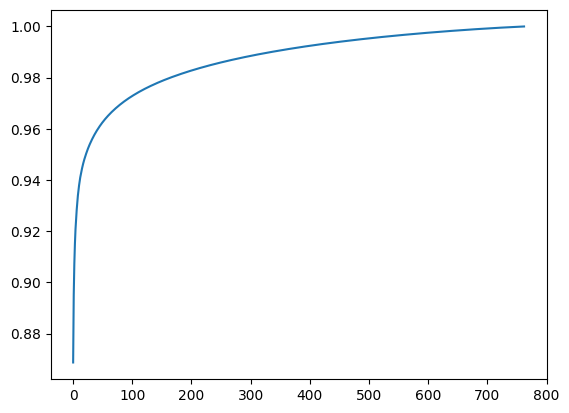

In [35]:
cumulative_variance = np.cumsum(pca_genes.explained_variance_ratio_)
plt.plot(range(len(pca_genes.explained_variance_ratio_)),cumulative_variance )

In [32]:
np.where(ycum <= 0.95)[0].shape[0]

22

## SPCA

In [43]:
n_components = 24
alpha = 1.0

spca = SparsePCA(n_components=n_components, alpha=alpha, random_state=0,verbose=True)
spca.fit(exp_mat.T)

[dict_learning] ...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

KeyboardInterrupt: 